In [156]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(4, 9, 10)
n = len(x)
y = 3 * x + 3 + 3 * np.random.randn(10)
data = np.vstack((x, y)).T

def ls(data=data,alpha = 0.01, m = 1):
    b0 = 0
    b1 = 1
    for _ in range(m):
        total_error = 0
        db0 = 0
        db1 = 0

        for x_i, y_i in data:
            y_pred = b0 + b1 * x_i
            err = y_pred - y_i
            total_error += err ** 2
            db0 += err
            db1 += err * x_i
        # Gradients
        dj_db0 = (2 / n) * db0
        dj_db1 = (2 / n) * db1
        b0 = b0 - alpha * dj_db0
        b1 = b1 - alpha * dj_db1
    return b0,b1

In [157]:
b0, b1 = ls()


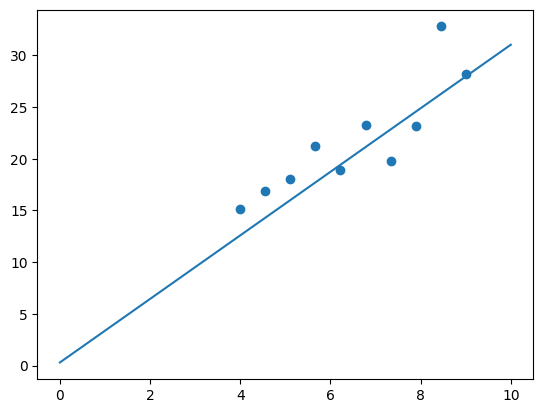

In [158]:
b1
x = np.linspace(0, 10)
def f(x):
    return x* b1 + b0
f = f(x)

plt.plot(x, f)
plt.scatter(data[:, 0], data[:, 1])

/var/folders/32/x9dgly0d26z5yqyvl8t2zw3c0000gn/T/ipykernel_14996/1369552513.py:29: RuntimeWarning: overflow encountered in scalar power
  total_error += err ** 2
/var/folders/32/x9dgly0d26z5yqyvl8t2zw3c0000gn/T/ipykernel_14996/1369552513.py:27: RuntimeWarning: overflow encountered in scalar multiply
  y_pred = b0 + b1 * x1_i + b2 * x2_i
/var/folders/32/x9dgly0d26z5yqyvl8t2zw3c0000gn/T/ipykernel_14996/1369552513.py:36: RuntimeWarning: invalid value encountered in scalar subtract
  b0 -= alpha * dj_db0
/var/folders/32/x9dgly0d26z5yqyvl8t2zw3c0000gn/T/ipykernel_14996/1369552513.py:37: RuntimeWarning: invalid value encountered in scalar subtract
  b1 -= alpha * dj_db1
/var/folders/32/x9dgly0d26z5yqyvl8t2zw3c0000gn/T/ipykernel_14996/1369552513.py:38: RuntimeWarning: invalid value encountered in scalar subtract
  b2 -= alpha * dj_db2


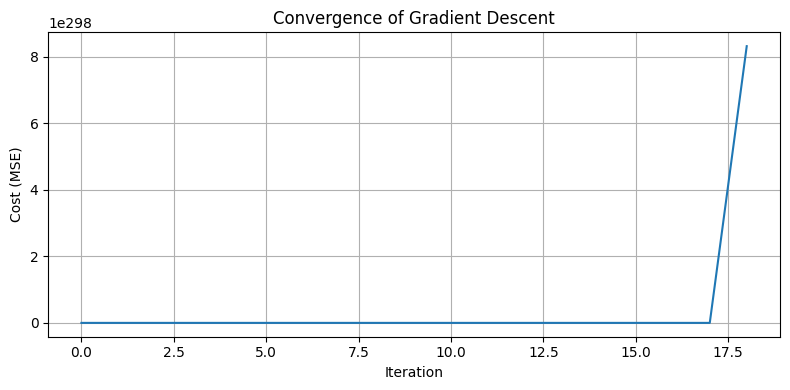

In [217]:
import numpy as np
import matplotlib.pyplot as plt

# Generate noisy data
x1 = np.arange(10, 80, 10)
x1 = x1 + 3 * np.random.randn(len(x1))

x2 = np.arange(40000, 110000, 10000)
x2 = x2 + 10000 * np.random.randn(len(x2))

y = np.arange(10000, 52000, 6000)

# Stack and transpose data to shape (N, 3)
data = np.vstack((x1, x2, y)).T
n = len(data)

# Least squares function with gradient descent
def ls(data=data, alpha=0.01, m=1000):
    b0 = b1 = b2 = 0
    n = len(data)
    cost_history = []

    for _ in range(m):
        db0 = db1 = db2 = 0
        total_error = 0
        for x1_i, x2_i, y_i in data:
            y_pred = b0 + b1 * x1_i + b2 * x2_i
            err = y_pred - y_i
            total_error += err ** 2
            db0 += err
            db1 += err * x1_i
            db2 += err * x2_i
        dj_db0 = (2 / n) * db0
        dj_db1 = (2 / n) * db1
        dj_db2 = (2 / n) * db2
        b0 -= alpha * dj_db0
        b1 -= alpha * dj_db1
        b2 -= alpha * dj_db2

        cost = (1 / n) * total_error
        cost_history.append(cost)

    return b0, b1, b2, cost_history

# Run gradient descent
b0, b1, b2, cost_history = ls()

# Plot cost over iterations
plt.figure(figsize=(8, 4))
plt.plot(cost_history)
plt.xlabel("Iteration")
plt.ylabel("Cost (MSE)")
plt.title("Convergence of Gradient Descent")
plt.grid(True)
plt.tight_layout()
plt.show()


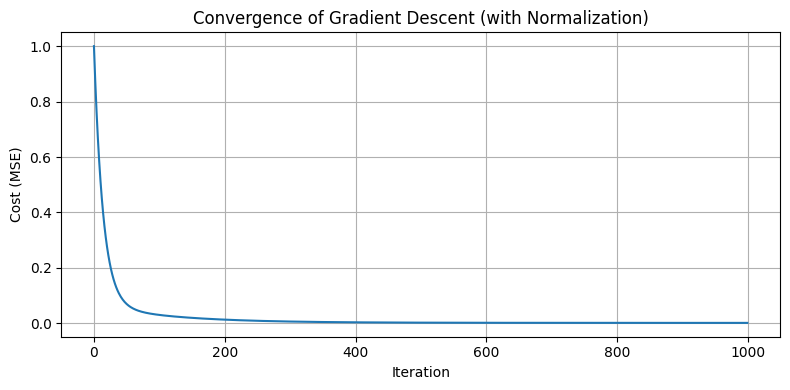

In [218]:
import numpy as np
import matplotlib.pyplot as plt

# Generate noisy data
x1 = np.arange(10, 80, 10)
x1 = x1 + 3 * np.random.randn(len(x1))

x2 = np.arange(40000, 110000, 10000)
x2 = x2 + 10000 * np.random.randn(len(x2))

y = np.arange(10000, 52000, 6000)

# Normalize features to avoid overflow
x1 = (x1 - np.mean(x1)) / np.std(x1)
x2 = (x2 - np.mean(x2)) / np.std(x2)
y = (y - np.mean(y)) / np.std(y)

# Stack and transpose data to shape (N, 3)
data = np.vstack((x1, x2, y)).T
n = len(data)

# Least squares function with gradient descent
def ls(data=data, alpha=0.01, m=1000):
    b0 = b1 = b2 = 0
    n = len(data)
    cost_history = []

    for _ in range(m):
        db0 = db1 = db2 = 0
        total_error = 0
        for x1_i, x2_i, y_i in data:
            y_pred = b0 + b1 * x1_i + b2 * x2_i
            err = y_pred - y_i
            total_error += err ** 2
            db0 += err
            db1 += err * x1_i
            db2 += err * x2_i
        dj_db0 = (2 / n) * db0
        dj_db1 = (2 / n) * db1
        dj_db2 = (2 / n) * db2
        b0 -= alpha * dj_db0
        b1 -= alpha * dj_db1
        b2 -= alpha * dj_db2

        cost = (1 / n) * total_error
        cost_history.append(cost)

    return b0, b1, b2, cost_history

# Run gradient descent
b0, b1, b2, cost_history = ls()

# Plot cost over iterations
plt.figure(figsize=(8, 4))
plt.plot(cost_history)
plt.xlabel("Iteration")
plt.ylabel("Cost (MSE)")
plt.title("Convergence of Gradient Descent (with Normalization)")
plt.grid(True)
plt.tight_layout()
plt.show()


array([10000, 16000, 22000, 28000, 34000, 40000, 46000])

In [178]:
len(x1), len(x2)

(7, 7)